# Vinyl Effect Audio Processor


In [1]:
import librosa
import soundfile as sf
import numpy as np
import wave
import matplotlib.pyplot as plt

In [2]:
input_file = "./Test/Test1.wav"


In [3]:
output_file = "./Test/scratched.wav"


In [4]:
y, sr = librosa.load(input_file, sr=None)

In [5]:
noise_len = len(y)
vinyl_noise = np.random.normal(0, 0.005, noise_len)

In [6]:
crackle = np.random.normal(0, 0.002, noise_len)
crackle[np.abs(crackle) < 0.001] = 0

In [7]:
t = np.linspace(0, noise_len/sr, noise_len, endpoint=False)
rumble = 0.002 * np.sin(2 * np.pi * 5 * t)

In [8]:
vinyl_effect = vinyl_noise + crackle + rumble

In [9]:
y_vinyl = y + vinyl_effect


In [10]:
y_vinyl = librosa.util.normalize(y_vinyl)


In [11]:
sf.write(output_file, y_vinyl, sr)

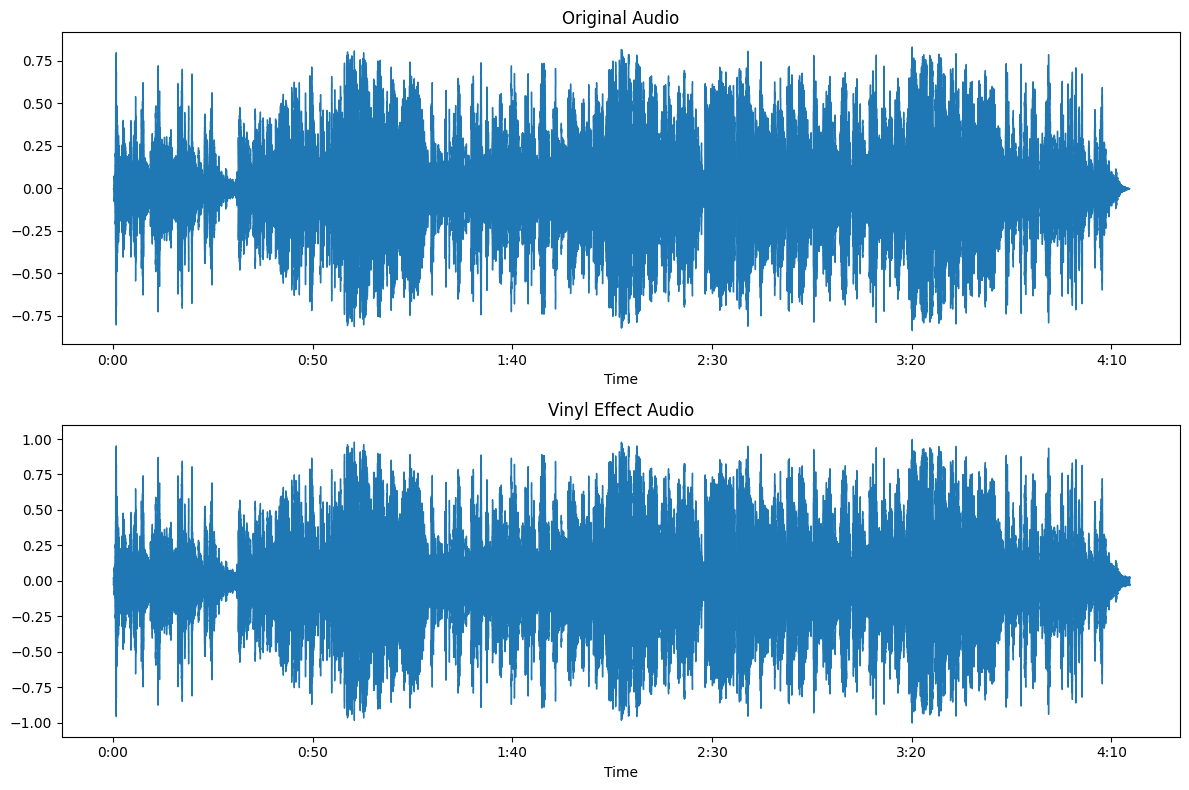

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_vinyl, sr=sr)
plt.title('Vinyl Effect Audio')
plt.tight_layout()
plt.show()

## That's It!